# Importando bibliotecas

In [22]:
import zipfile  # extrair o zip
from io import BytesIO  # reconhecer numeros binarios e converter
from PIL import Image
import matplotlib.pyplot as plt  # plotar graficos
import os  # SO do computador
import shutil  # para manipulação de arquivos e diretorios
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.image as mpimg
import random
from tensorflow import keras


In [53]:

for dirname, _, filenames in os.walk(
     r"C:\Users\libhi\Projeto_SignLanguage\dataset_SignLanguage\30 FPS\30 FPS\train"

):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# train dataset
bank_dir = r"C:\Users\libhi\Projeto_SignLanguage\dataset_SignLanguage\30 FPS\30 FPS\train\bank"
bus_dir = r"C:\Users\libhi\Projeto_SignLanguage\dataset_SignLanguage\30 FPS\30 FPS\train\bus"
car_dir = r"C:\Users\libhi\Projeto_SignLanguage\dataset_SignLanguage\30 FPS\30 FPS\train\car"
formation_dir = r"C:\Users\libhi\Projeto_SignLanguage\dataset_SignLanguage\30 FPS\30 FPS\train\formation"
hospital_dir = r"C:\Users\libhi\Projeto_SignLanguage\dataset_SignLanguage\30 FPS\30 FPS\train\hospital"
I_dir = r"C:\Users\libhi\Projeto_SignLanguage\dataset_SignLanguage\30 FPS\30 FPS\train\I"
man_dir = r"C:\Users\libhi\Projeto_SignLanguage\dataset_SignLanguage\30 FPS\30 FPS\train\man"
motorcycle_dir = r"C:\Users\libhi\Projeto_SignLanguage\dataset_SignLanguage\30 FPS\30 FPS\train\motorcycle"
my_dir = r"C:\Users\libhi\Projeto_SignLanguage\dataset_SignLanguage\30 FPS\30 FPS\train\my"
supermarket_dir = r"C:\Users\libhi\Projeto_SignLanguage\dataset_SignLanguage\30 FPS\30 FPS\train\supermarket"
we_dir = r"C:\Users\libhi\Projeto_SignLanguage\dataset_SignLanguage\30 FPS\30 FPS\train\we"
woman_dir = r"C:\Users\libhi\Projeto_SignLanguage\dataset_SignLanguage\30 FPS\30 FPS\train\woman"
you_dir = r"C:\Users\libhi\Projeto_SignLanguage\dataset_SignLanguage\30 FPS\30 FPS\train\you"
youplural_dir = r"C:\Users\libhi\Projeto_SignLanguage\dataset_SignLanguage\30 FPS\30 FPS\train\you (plural)"
youPlural_dir = r"C:\Users\libhi\Projeto_SignLanguage\dataset_SignLanguage\validation\validation\youPlural"
your_dir = r"C:\Users\libhi\Projeto_SignLanguage\dataset_SignLanguage\30 FPS\30 FPS\train\your"

bank_image = os.listdir(bank_dir)
bus_image = os.listdir(bus_dir)
car_image = os.listdir(car_dir)
formation_image = os.listdir(formation_dir)
hospital_image = os.listdir(hospital_dir)
I_image = os.listdir(I_dir)
man_image = os.listdir(man_dir)
motorcycle_image = os.listdir(motorcycle_dir)
my_image = os.listdir(my_dir)
supermarket_image = os.listdir(supermarket_dir)
we_image = os.listdir(we_dir)
woman_image = os.listdir(woman_dir)
you_image = os.listdir(you_dir)
youPlural_image = os.listdir(youPlural_dir)
your_image = os.listdir(your_dir)
motorcycle_image = os.listdir(motorcycle_dir)
youPlural_image = os.listdir(youPlural_dir)
your_plural_image=(youplural_dir)



len(bank_image),len(bus_image),len(car_image),len(formation_image),len(hospital_image),len(I_image),len(man_image), len(motorcycle_image), len(my_image),len(supermarket_image),len(we_image),len(you_image),len(your_plural_image),len(youPlural_image),len(your_image)

C:\Users\libhi\Projeto_SignLanguage\dataset_SignLanguage\30 FPS\30 FPS\train\bank\bank_1605967420.8409734
C:\Users\libhi\Projeto_SignLanguage\dataset_SignLanguage\30 FPS\30 FPS\train\bank\bank_1605967420.8409889
C:\Users\libhi\Projeto_SignLanguage\dataset_SignLanguage\30 FPS\30 FPS\train\bank\bank_1605967420.8410015
C:\Users\libhi\Projeto_SignLanguage\dataset_SignLanguage\30 FPS\30 FPS\train\bank\bank_1605967420.8410125
C:\Users\libhi\Projeto_SignLanguage\dataset_SignLanguage\30 FPS\30 FPS\train\bank\bank_1605967420.8410249
C:\Users\libhi\Projeto_SignLanguage\dataset_SignLanguage\30 FPS\30 FPS\train\bank\bank_1605967420.841037
C:\Users\libhi\Projeto_SignLanguage\dataset_SignLanguage\30 FPS\30 FPS\train\bank\bank_1605967420.841048
C:\Users\libhi\Projeto_SignLanguage\dataset_SignLanguage\30 FPS\30 FPS\train\bank\bank_1605967420.8410597
C:\Users\libhi\Projeto_SignLanguage\dataset_SignLanguage\30 FPS\30 FPS\train\bank\bank_1605967420.8410692
C:\Users\libhi\Projeto_SignLanguage\dataset_Sign

(220, 268, 252, 4320, 219, 150, 178, 259, 187, 267, 288, 203, 89, 49, 168)

In [51]:

# Making train val split (BANK SIGN)
train_bank_image = bank_image[: int(0.8 * len(bank_image))]
val_bank_image = bank_image[int(0.8 * len(bank_image)) :]

# Making train val split (BUS SIGN)
train_bus_image = bus_image[: int(0.8 * len(bus_image))]
val_bus_image = bus_image[int(0.8 * len(bus_image)) :]

# Making train val split (CAR SIGN)
train_car_image = car_image[: int(0.8 * len(car_image))]
val_car_image = car_image[int(0.8 * len(car_image)) :]

# Making train val split (FORMATION SIGN)
train_formation_image = formation_image[: int(0.8 * len(formation_image))]
val_formation_image = formation_image[int(0.8 * len(formation_image)) :]

# Making train val split (HOSPITAL SIGN)
train_hospital_image = hospital_image[: int(0.8 * len(hospital_image))]
val_hospital_image = hospital_image[int(0.8 * len(hospital_image)) :]

# Making train val split (I SIGN)
train_I_image = I_image[: int(0.8 * len(I_image))]
val_I_image = I_image[int(0.8 * len(I_image)) :]

# Making train val split (MAN SIGN)
train_man_image = man_image[: int(0.8 * len(man_image))]
val_man_image = man_image[int(0.8 * len(man_image)) :]

# Making train val split (MOTORCYCLE SIGN)
train_motorcycle_image = motorcycle_image[: int(0.8 * len(motorcycle_image))]
val_motorcycle_image = motorcycle_image[int(0.8 * len(motorcycle_image)) :]

# Making train val split (MY SIGN)
train_my_image = my_image[: int(0.8 * len(my_image))]
val_my_image = my_image[int(0.8 * len(my_image)) :]

# Making train val split (SUPERMARKET SIGN)
train_supermarket_image = supermarket_image[: int(0.8 * len(supermarket_image))]
val_supermarket_image = supermarket_image[int(0.8 * len(supermarket_image)) :]

# Making train val split (WE SIGN)
train_we_image = we_image[: int(0.8 * len(we_image))]
val_we_image = we_image[int(0.8 * len(we_image)) :]

# Making train val split (YOU SIGN)
train_you_image = you_image[: int(0.8 * len(you_image))]
val_you_image = you_image[int(0.8 * len(you_image)) :]

# Making train val split (YOU PLURAL SIGN)
train_youPlural_image = youPlural_image[: int(0.8 * len(youPlural_image))]
val_youPlural_image = youPlural_image[int(0.8 * len(youPlural_image)) :]

# Making train val split (YOU plural SIGN)
train_youplural_image = your_plural_image[: int(0.8 * len(your_plural_image))]
val_youplural_image = your_plural_image[int(0.8 * len(your_plural_image)) :]

# Making train val split (YOUR SIGN)
train_your_image = your_image[: int(0.8 * len(your_image))]
val_your_image = your_image[int(0.8 * len(your_image)) :]


In [65]:

train_dir = r"C:\Users\libhi\Projeto_SignLanguage\dataset_SignLanguage\30 FPS\30 FPS\train"
val_dir = r"C:\Users\libhi\Projeto_SignLanguage\dataset_SignLanguage\validation\validation"

# Create directories (BANK)
os.makedirs(train_dir + "\\bank", exist_ok=True)
os.makedirs(val_dir + "\\bank", exist_ok=True)


# Copy images to train directory (bank)
for image in train_bank_image:
    src = bank_dir + "\\" + image
    dst = train_dir + "\\bank"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (bank)
for image in val_bank_image:
    src = bank_dir + "\\" + image
    dst = val_dir + "\\bank"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass


# Create directories (BUS)
os.makedirs(train_dir + "\\bus", exist_ok=True)
os.makedirs(val_dir + "\\bus", exist_ok=True)

# Copy images to train directory (bus)
for image in train_bus_image:
    src = bus_dir + "\\" + image
    dst = train_dir + "\\bus"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (bus)
for image in val_bus_image:
    src = bus_dir + "\\" + image
    dst = val_dir + "\\bus"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass


# Create directories (CAR)
os.makedirs(train_dir + "\\car", exist_ok=True)
os.makedirs(val_dir + "\\car", exist_ok=True)

# Copy images to train directory (car)
for image in train_car_image:
    src = car_dir + "\\" + image
    dst = train_dir + "\\car"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (car)
for image in val_car_image:
    src = car_dir + "\\" + image
    dst = val_dir + "\\car"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass


# Create directories (FORMATION)
os.makedirs(train_dir + "\\formation", exist_ok=True)
os.makedirs(val_dir + "\\formation", exist_ok=True)

# Copy images to train directory (formation)
for image in train_formation_image:
    src = formation_dir + "\\" + image
    dst = train_dir + "\\formation"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (formation)
for image in val_formation_image:
    src = formation_dir + "\\" + image
    dst = val_dir + "\\formation"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass


# Create directories (HOSPITAL)
os.makedirs(train_dir + "\\hospital", exist_ok=True)
os.makedirs(val_dir + "\\hospital", exist_ok=True)

# Copy images to train directory (hospital)
for image in train_hospital_image:
    src = hospital_dir + "\\" + image
    dst = train_dir + "\\hospital"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (hospital)
for image in val_hospital_image:
    src = hospital_dir + "\\" + image
    dst = val_dir + "\\hospital"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass


# Create directories (I)
os.makedirs(train_dir + "\\I", exist_ok=True)
os.makedirs(val_dir + "\\I", exist_ok=True)

# Copy images to train directory (I)
for image in train_I_image:
    src = I_dir + "\\" + image
    dst = train_dir + "\\I"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (I)
for image in val_I_image:
    src = I_dir + "\\" + image
    dst = val_dir + "\\I"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass


# Create directories (MAN)
os.makedirs(train_dir + "\man", exist_ok=True)
os.makedirs(val_dir + "\man", exist_ok=True)

# Copy images to train directory (MAN)
for image in train_man_image:
    src = man_dir + "\\" + image
    dst = train_dir + "\man"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (MAN)
for image in val_man_image:
    src = man_dir + "\\" + image
    dst = val_dir + "\man"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass


# Create directories (MOTORCYCLE)
os.makedirs(train_dir + "\motorcycle", exist_ok=True)
os.makedirs(val_dir + "\motorcycle", exist_ok=True)

# Copy images to train directory (motorcycle)
for image in train_motorcycle_image:
    src = motorcycle_dir + "\\" + image
    dst = train_dir + "\motorcycle"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (motorcycle)
for image in val_motorcycle_image:
    src = motorcycle_dir + "\\" + image
    dst = val_dir + "\motorcycle"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Create directories (MY)
os.makedirs(train_dir + "\my", exist_ok=True)
os.makedirs(val_dir + "\my", exist_ok=True)

# Copy images to train directory (my)
for image in train_my_image:
    src = my_dir + "\\" + image
    dst = train_dir + "\my"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (my)
for image in val_my_image:
    src = my_dir + "\\" + image
    dst = val_dir + "\my"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass


# Create directories (SUPERMARKET)
os.makedirs(train_dir + "\supermarket", exist_ok=True)
os.makedirs(val_dir + "\supermarket", exist_ok=True)

# Copy images to train directory (supermarket)
for image in train_supermarket_image:
    src = supermarket_dir + "\\" + image
    dst = train_dir + "\supermarket"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (supermarket)
for image in val_supermarket_image:
    src = supermarket_dir + "\\" + image
    dst = val_dir + "\supermarket"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass


# Create directories (we)
os.makedirs(train_dir + "\we", exist_ok=True)
os.makedirs(val_dir + "\we", exist_ok=True)

# Copy images to train directory (we)
for image in train_we_image:
    src = we_dir + "\\" + image
    dst = train_dir + "\we"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (we)
for image in val_we_image:
    src = we_dir + "\\" + image
    dst = val_dir + "\we"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass


# Create directories (you)
os.makedirs(train_dir + "\you", exist_ok=True)
os.makedirs(val_dir + "\you", exist_ok=True)

# Copy images to train directory (you)
for image in train_you_image:
    src = you_dir + "\\" + image
    dst = train_dir + "\you"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (you)
for image in val_you_image:
    src = you_dir + "\\" + image
    dst = val_dir + "\you"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Create directories (youPyou (plural))
os.makedirs(train_dir + "\\you (plural)", exist_ok=True)
os.makedirs(val_dir + "\\you (plural)", exist_ok=True)


# Copy images to train directory (you (plural))
for image in train_bank_image:
    src = bank_dir + "\\" + image
    dst = train_dir + "\\you (plural)"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (you (plural))
for image in val_bank_image:
    src = bank_dir + "\\" + image
    dst = val_dir + "\\you (plural)"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Create directories (youPlural)
os.makedirs(train_dir + "\youPlural", exist_ok=True)
os.makedirs(val_dir + "\youPlural", exist_ok=True)

# Copy images to train directory (youPlural)
for image in train_youPlural_image:
    src = youPlural_dir + "\\" + image
    dst = train_dir + "\youPlural"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (youPlural)
for image in val_youPlural_image:
    src = youPlural_dir + "\\" + image
    dst = val_dir + "\youPlural"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass



# Create directories (your)
os.makedirs(train_dir + "\your", exist_ok=True)
os.makedirs(val_dir + "\your", exist_ok=True)

# Copy images to train directory (your)
for image in train_your_image:
    src = your_dir + "\\" + image
    dst = train_dir + "\your"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (your)
for image in val_your_image:
    src = your_dir + "\\" + image
    dst = val_dir + "\your"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass


# # Plot Image (BANK)
# def view_random_image_bank(bank_dir, bank_image):
#     target_folder = bank_dir + "\\"
#     random_image = random.choice(os.listdir(target_folder))

#     img = mpimg.imread(target_folder + random_image)
#     print(img.shape)
#     plt.title(bank_image)
#     plt.imshow(img)
#     plt.axis("off")


# view_random_image_bank(bank_dir, "bank")


# # Plot Image (BUS)
# def view_random_image_bus(bus_dir, bus_image):
#     target_folder = bus_dir + "\\"
#     random_image = random.choice(os.listdir(target_folder))

#     img = mpimg.imread(target_folder + random_image)
#     print(img.shape)
#     plt.title(bus_image)
#     plt.imshow(img)
#     plt.axis("off")


# view_random_image_bus(bus_dir, "bus")


# # Plot Image (CAR)
# def view_random_image_car(car_dir, car_image):
#     target_folder = car_dir + "\\"
#     random_image = random.choice(os.listdir(target_folder))

#     img = mpimg.imread(target_folder + random_image)
#     print(img.shape)
#     plt.title(car_image)
#     plt.imshow(img)
#     plt.axis("off")


# view_random_image_car(car_dir, "car")


# # Plot Image (FORMATION)
# def view_random_image_formation(formation_dir, formation_image):
#     target_folder = formation_dir + "\\"
#     random_image = random.choice(os.listdir(target_folder))

#     img = mpimg.imread(target_folder + random_image)
#     print(img.shape)
#     plt.title(formation_image)
#     plt.imshow(img)
#     plt.axis("off")


# view_random_image_formation(formation_dir, "formation")


# # Plot Image (HOSPITAL)
# def view_random_image_hospital(hospital_dir, hospital_image):
#     target_folder = hospital_dir + "\\"
#     random_image = random.choice(os.listdir(target_folder))

#     img = mpimg.imread(target_folder + random_image)
#     print(img.shape)
#     plt.title(hospital_image)
#     plt.imshow(img)
#     plt.axis("off")


# view_random_image_hospital(hospital_dir, "hospital")


# # Plot Image (I)
# def view_random_image_I(I_dir, I_image):
#     target_folder = I_dir + "\\"
#     random_image = random.choice(os.listdir(target_folder))

#     img = mpimg.imread(target_folder + random_image)
#     print(img.shape)
#     plt.title(I_image)
#     plt.imshow(img)
#     plt.axis("off")


# view_random_image_I(I_dir, "I")


# # Plot Image (MAN)
# def view_random_image_man(man_dir, man_image):
#     target_folder = man_dir + "\\"
#     random_image = random.choice(os.listdir(target_folder))

#     img = mpimg.imread(target_folder + random_image)
#     print(img.shape)
#     plt.title(man_image)
#     plt.imshow(img)
#     plt.axis("off")


# view_random_image_man(man_dir, "man")


# # Plot Image (MOTORCYCLE)
# def view_random_image_motorcycle(motorcycle_dir, motorcycle_image):
#     target_folder = motorcycle_dir + "\\"
#     random_image = random.choice(os.listdir(target_folder))

#     img = mpimg.imread(target_folder + random_image)
#     print(img.shape)
#     plt.title(motorcycle_image)
#     plt.imshow(img)
#     plt.axis("off")


# view_random_image_motorcycle(motorcycle_dir, "motorcycle")


# # Plot Image (MY)
# def view_random_image_my(my_dir, my_image):
#     target_folder = my_dir + "\\"
#     random_image = random.choice(os.listdir(target_folder))

#     img = mpimg.imread(target_folder + random_image)
#     print(img.shape)
#     plt.title(my_image)
#     plt.imshow(img)
#     plt.axis("off")


# view_random_image_my(my_dir, "my")


# # Plot Image (SUPERMARKET)
# def view_random_image_supermarket(supermarket_dir, supermarket_image):
#     target_folder = supermarket_dir + "\\"
#     random_image = random.choice(os.listdir(target_folder))

#     img = mpimg.imread(target_folder + random_image)
#     print(img.shape)
#     plt.title(supermarket_image)
#     plt.imshow(img)
#     plt.axis("off")


# view_random_image_supermarket(supermarket_dir, "supermarket")


# # Plot Image (WE)
# def view_random_image_we(we_dir, we_image):
#     target_folder = we_dir + "\\"
#     random_image = random.choice(os.listdir(target_folder))

#     img = mpimg.imread(target_folder + random_image)
#     print(img.shape)
#     plt.title(we_image)
#     plt.imshow(img)
#     plt.axis("off")


# view_random_image_we(we_dir, "we")


# # Plot Image (WOMAN)
# def view_random_image_woman(woman_dir, woman_image):
#     target_folder = woman_dir + "\\"
#     random_image = random.choice(os.listdir(target_folder))

#     img = mpimg.imread(target_folder + random_image)
#     print(img.shape)
#     plt.title(woman_image)
#     plt.imshow(img)
#     plt.axis("off")


# view_random_image_woman(woman_dir, "woman")


# # Plot Image (YOU)
# def view_random_image_you(you_dir, you_image):
#     target_folder = you_dir + "\\"
#     random_image = random.choice(os.listdir(target_folder))

#     img = mpimg.imread(target_folder + random_image)
#     print(img.shape)
#     plt.title(you_image)
#     plt.imshow(img)
#     plt.axis("off")


# view_random_image_you(you_dir, "you")


# # Plot Image (youPlural)
# def view_random_image_youplural(youPlural_dir, youPlural_image):
#     target_folder = youPlural_dir + "\\"
#     random_image = random.choice(os.listdir(target_folder))

#     img = mpimg.imread(target_folder + random_image)
#     print(img.shape)
#     plt.title(youPlural_image)
#     plt.imshow(img)
#     plt.axis("off")


# view_random_image_youplural(youPlural_dir, "youPlural")



(1280, 720, 3)
(1280, 720, 3)


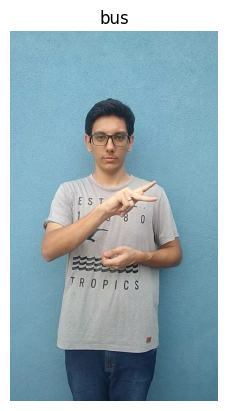

In [66]:
# Plot Image (YOUR)
def view_random_image_your(your_dir, your_image):
    target_folder = your_dir + "\\"
    random_image = random.choice(os.listdir(target_folder))

    img = mpimg.imread(target_folder + random_image)
    print(img.shape)
    plt.title(your_image)
    plt.imshow(img)
    plt.axis("off")


view_random_image_your(your_dir, "your")

(1280, 720, 3)


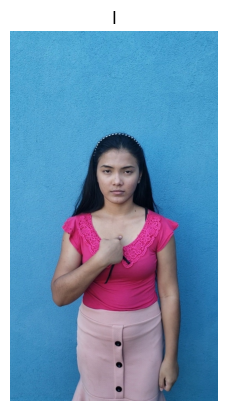

In [67]:
view_random_image_your(I_dir, "I")

(1280, 720, 3)


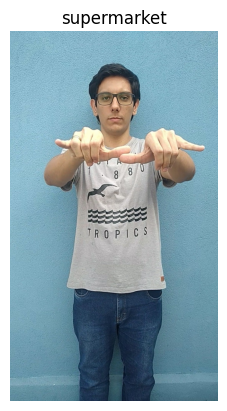

(1280, 720, 3)


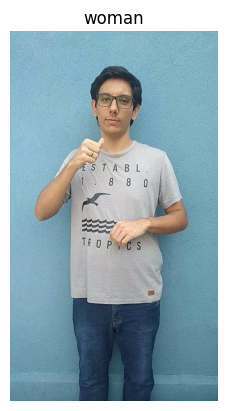

(1280, 720, 3)


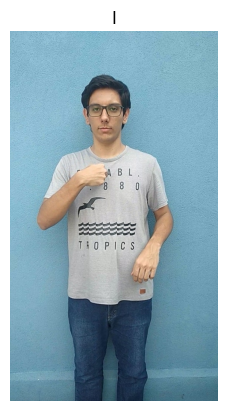

(1280, 720, 3)


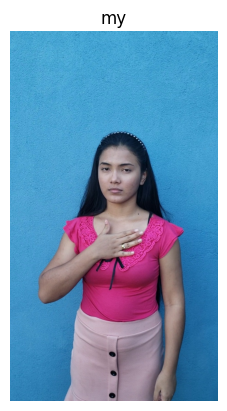

(1280, 720, 3)


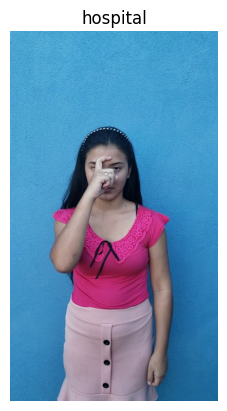

(1280, 720, 3)


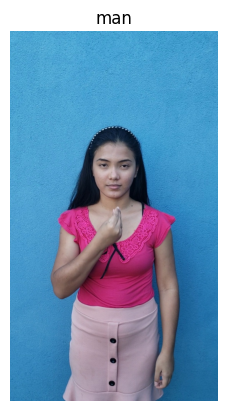

(1280, 720, 3)


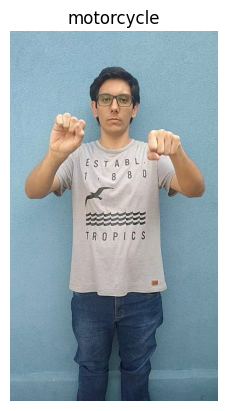

(1280, 720, 3)


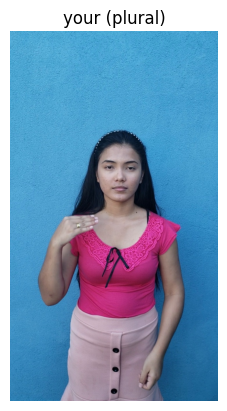

(1280, 720, 3)


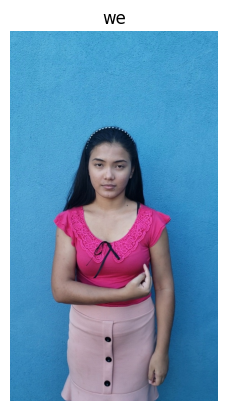

In [61]:
# Track displayed images
displayed_images = set()

def view_random_image(target_folder, title):
    global displayed_images
    random_image = random.choice(os.listdir(target_folder))

    # Ensure the selected image hasn't been displayed before
    while random_image in displayed_images:
        random_image = random.choice(os.listdir(target_folder))

    displayed_images.add(random_image)

    img = mpimg.imread(os.path.join(target_folder, random_image))
    print(img.shape)
    plt.title(title)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Call the function for at least three different categories
view_random_image(supermarket_dir, "supermarket")
view_random_image(woman_dir, "woman")
view_random_image(I_dir, "I")
view_random_image(my_dir, "my")
view_random_image(hospital_dir, "hospital")
view_random_image(man_dir, "man")
view_random_image(motorcycle_dir, "motorcycle")
view_random_image(youplural_dir, "your (plural)")
view_random_image(we_dir, "we")







In [68]:
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.)
val_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.)


In [70]:
train_dataset = train_data_gen.flow_from_directory(train_dir,
                                                  target_size = (227,227),
                                                  class_mode = 'categorical')

val_dataset = val_data_gen.flow_from_directory(val_dir,
                                              target_size = (227,227),
                                              class_mode = 'categorical')

Found 0 images belonging to 16 classes.
Found 0 images belonging to 16 classes.


In [115]:
df_file_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12998 entries, 0 to 12997
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T/T/V   12998 non-null  object
 1   Label   12998 non-null  object
 2   File    12998 non-null  object
dtypes: object(3)
memory usage: 304.8+ KB


In [116]:
print(df_file_info)

            T/T/V Label                     File
0            test     I      I_1605967125.294393
1            test     I     I_1605967125.2944071
2            test     I      I_1605967125.294418
3            test     I     I_1605967125.2944283
4            test     I     I_1605967125.2944384
...           ...   ...                      ...
12993  validation  your  your_1605967469.0494037
12994  validation  your  your_1605967469.0494146
12995  validation  your  your_1605967469.0494275
12996  validation  your  your_1605967469.0494397
12997  validation  your  your_1605967469.0494523

[12998 rows x 3 columns]


In [117]:
# Dividir o dataset
classes = df_file_info['Label'].unique()
print(classes)

['I' 'bank' 'bus' 'car' 'formation' 'hospital' 'man' 'motorcycle' 'my'
 'supermarket' 'we' 'woman' 'you (plural)' 'you' 'your']


In [118]:
# Separating into different datasets based on 'Third_to_last_folder'
test_dataset = df_file_info[df_file_info['T/T/V'] == 'test']

# Displaying the DataFrames
print("Test Dataset:")
print(test_dataset)

Test Dataset:
     T/T/V Label                     File
0     test     I      I_1605967125.294393
1     test     I     I_1605967125.2944071
2     test     I      I_1605967125.294418
3     test     I     I_1605967125.2944283
4     test     I     I_1605967125.2944384
...    ...   ...                      ...
1840  test  your  your_1605967125.2895226
1841  test  your   your_1605967125.289536
1842  test  your  your_1605967125.2895467
1843  test  your  your_1605967125.2895591
1844  test  your  your_1605967125.2895713

[1845 rows x 3 columns]


In [119]:
train_dataset = df_file_info[df_file_info['T/T/V'] == 'train']
validation_dataset = df_file_info[df_file_info['T/T/V'] == 'validation']

# Displaying the DataFrames
print("Train Dataset:")
print(train_dataset)
print("\nValidation Dataset:")
print(validation_dataset)

Train Dataset:
      T/T/V Label                     File
1845  train     I     I_1605967420.9372084
1846  train     I     I_1605967420.9372222
1847  train     I     I_1605967420.9372318
1848  train     I     I_1605967420.9372416
1849  train     I     I_1605967420.9372516
...     ...   ...                      ...
9226  train  your  your_1605967420.9122114
9227  train  your  your_1605967420.9122274
9228  train  your  your_1605967420.9122422
9229  train  your  your_1605967420.9122605
9230  train  your  your_1605967420.9122758

[7386 rows x 3 columns]

Validation Dataset:
            T/T/V Label                     File
9231   validation     I     I_1605967469.0635996
9232   validation     I      I_1605967469.063616
9233   validation     I     I_1605967469.0636299
9234   validation     I      I_1605967469.063642
9235   validation     I     I_1605967469.0636528
...           ...   ...                      ...
12993  validation  your  your_1605967469.0494037
12994  validation  your  your_1

In [128]:
# x = dados.iloc[:,0:4].values # Dados de entrada do modelo serão as imagens capturadas pela webcam 
y = df_file_info['Label'].values # Dados de saída (desejada)

In [133]:
from sklearn.preprocessing import StandardScaler # padronizar os dados

In [ ]:
# sc = StandardScaler()
# sc.fit(train_dataset)
# dados_entrada_treino_padronizados = sc.fit_transform(train_dataset)
# dados_entrada_teste_padronizados = sc.fit_transform(test_dataset)

In [148]:
dados_saida_treino_onhot = pd.get_dummies(train_dataset).values
# print(dados_saida_treino_onhot)
dados_saida_teste_onhot = pd.get_dummies(test_dataset).values

In [3]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Criando a rede MLP
# Modelo com uma camada oculta de 64 neuronios
# Camada de saida com 3 neuronios (3 classes)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=128, input_dim=4, activation='sigmoid'))
#model.add(tf.keras.layers.Dense(128, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=3, activation='softmax'))
model.summary()